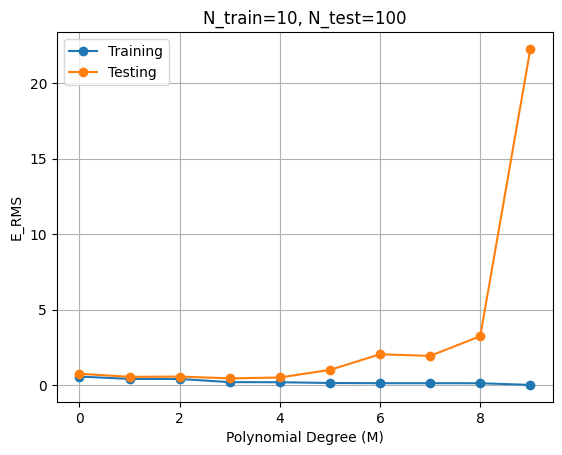

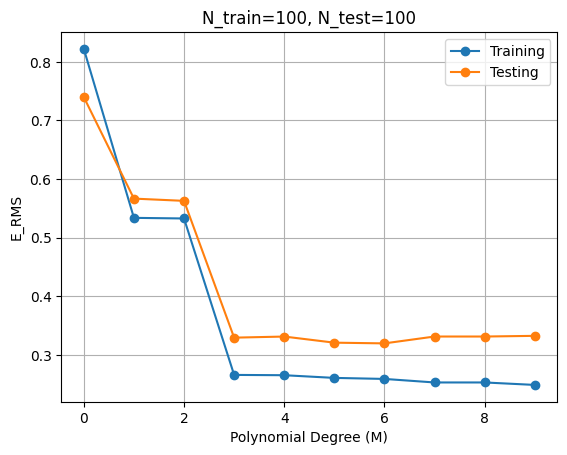

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, seed, noise_std=0.3):
    """
    Generate N data points:
      x ~ Uniform(0,1)
      t = sin(2*pi*x) + noise, noise ~ N(0, noise_std)
    """
    np.random.seed(seed)
    x = np.random.uniform(0, 1, N)
    noise = np.random.normal(0, noise_std, N)
    t = np.sin(2.0 * np.pi * x) + noise
    return x, t

def design_matrix(x, M):
    """
    Return an N x (M+1) design matrix for inputs x,
    containing columns [1, x, x^2, ..., x^M].
    """
    # N points
    N = len(x)
    Phi = np.zeros((N, M+1))
    for m in range(M+1):
        Phi[:, m] = x**m
    return Phi

def closed_form_solution(Phi, t):
    """
    Returns weight vector w via the normal equation:
      w = (Φ^T Φ)^-1 Φ^T t
    """
    w = np.linalg.pinv(Phi) @ t
    return w

def rmse(y, t):
    """
    Root Mean Square Error between predictions y and targets t.
    """
    return np.sqrt(np.mean((y - t)**2))

def do_experiment(N_train, seed_train, N_test, seed_test):
    """
    1) Generate train data of size N_train, test data of size N_test
    2) Fit polynomials of degree 0..9
    3) Compute training RMSE and test RMSE for each degree
    4) Return two lists: train_errors, test_errors
    """
    # Generate data
    x_train, t_train = generate_data(N_train, seed_train)
    x_test, t_test   = generate_data(N_test,  seed_test)

    train_errors = []
    test_errors  = []

    for M in range(10):
        # Build design matrices
        Phi_train = design_matrix(x_train, M)  # shape (N_train, M+1)
        Phi_test  = design_matrix(x_test, M)   # shape (N_test, M+1)

        # Compute weights
        w = closed_form_solution(Phi_train, t_train)

        # Predictions
        y_train = Phi_train @ w
        y_test  = Phi_test  @ w

        # RMSE
        train_rmse = rmse(y_train, t_train)
        test_rmse  = rmse(y_test,  t_test)

        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return train_errors, test_errors

def plot_results(train_errs, test_errs, title):
    """
    Plots training/test errors vs. polynomial degree.
    """
    degrees = range(10)
    plt.plot(degrees, train_errs, '-o', label="Training")
    plt.plot(degrees, test_errs,  '-o', label="Testing")
    plt.xlabel("Polynomial Degree (M)")
    plt.ylabel("E_RMS")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def main():

    seed_train = 3
    seed_test  = 5

    # Experiment 1: N_train = 10
    N_train_1  = 10
    N_test     = 100
    train_rmse_10, test_rmse_10 = do_experiment(
        N_train_1, seed_train,
        N_test,    seed_test
    )

    # Experiment 2: N_train = 100
    N_train_2  = 100
    train_rmse_100, test_rmse_100 = do_experiment(
        N_train_2, seed_train,
        N_test,    seed_test
    )

    # Plot both results
    plot_results(train_rmse_10, test_rmse_10,   "N_train=10, N_test=100")
    plot_results(train_rmse_100, test_rmse_100, "N_train=100, N_test=100")

if __name__ == "__main__":
    main()
